In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cardio.csv")
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,Hypertension Stage 1,Hypertension Stage 1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,60,37.729725,Hypertension Stage 1,Hypertension Stage 1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,61,29.983588,Hypertension Stage 1,Hypertension Stage 1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48,28.440955,Normal,Normal
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54,25.282570,Normal,Normal


# Display summary statistics

In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [4]:
# Check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [5]:
df.shape

(68205, 17)

In [6]:
df.describe(include=['O'])

,bp_category,bp_category_encoded
count,68205,68205
unique,4,4
top,Hypertension Stage 1,Hypertension Stage 1
freq,39750,39750


In [7]:
df.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [9]:
df.shape

(68205, 17)

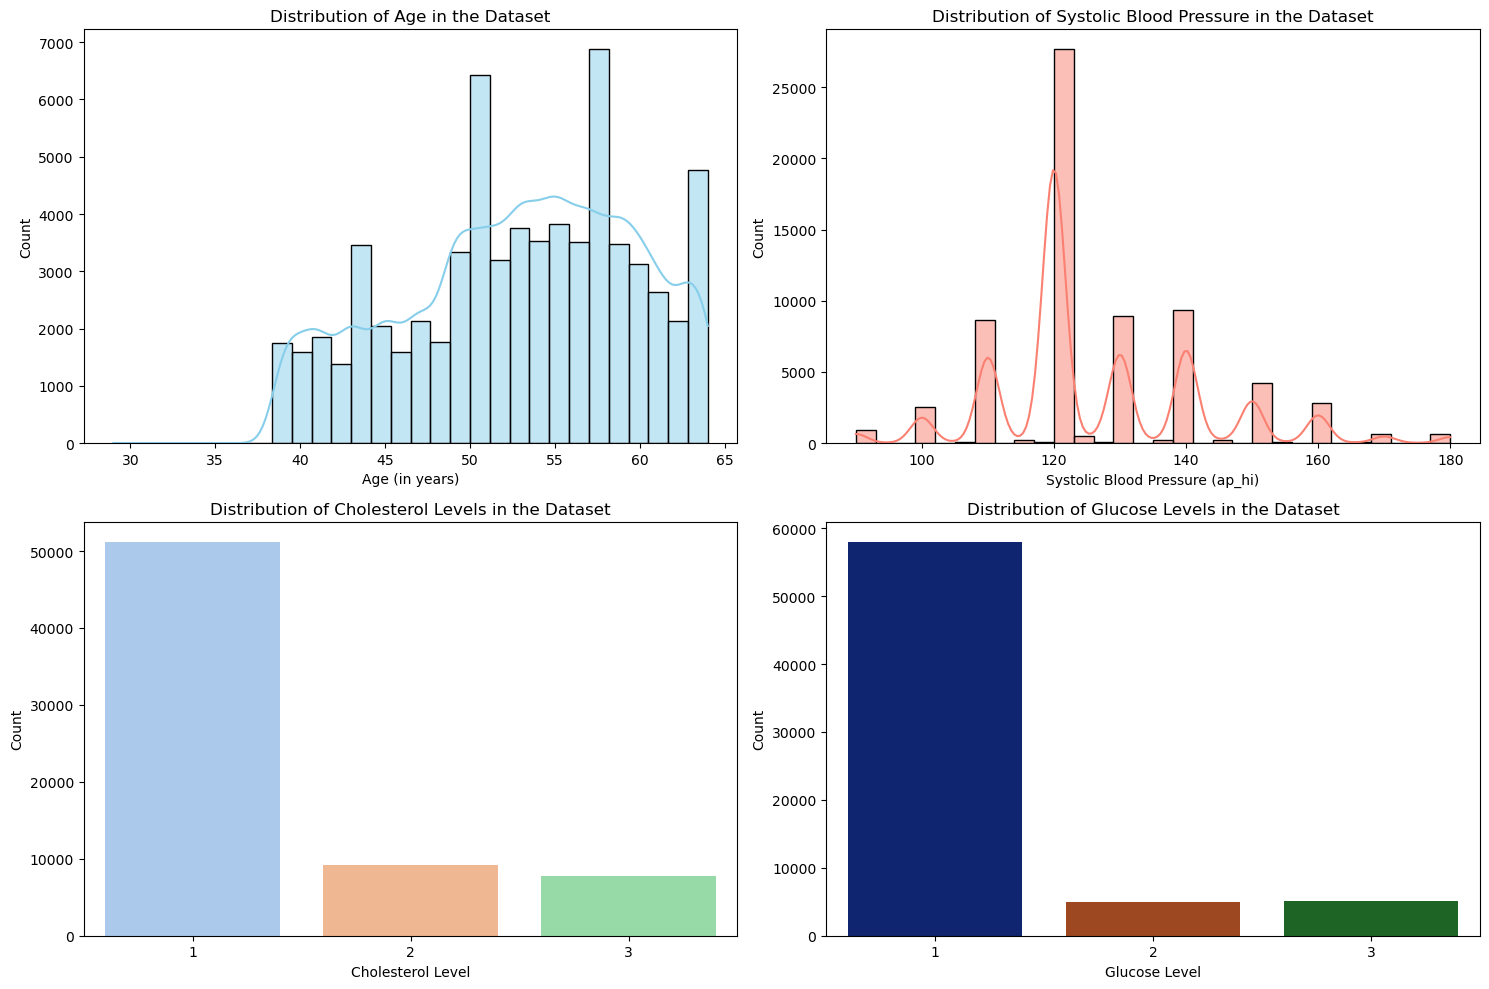

In [10]:
# Visualize the distribution of key variables
plt.figure(figsize=(15, 10))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age_years'], bins=30, kde=True, color='skyblue')
plt.xlabel('Age (in years)')
plt.ylabel('Count')
plt.title('Distribution of Age in the Dataset')

# Blood Pressure Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['ap_hi'], bins=30, kde=True, color='salmon')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Count')
plt.title('Distribution of Systolic Blood Pressure in the Dataset')

# Cholesterol Levels
plt.subplot(2, 2, 3)
sns.countplot(x='cholesterol', data=df, palette='pastel')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.title('Distribution of Cholesterol Levels in the Dataset')

# Glucose Levels
plt.subplot(2, 2, 4)
sns.countplot(x='gluc', data=df, palette='dark')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.title('Distribution of Glucose Levels in the Dataset')

plt.tight_layout()
plt.show()

/var/folders/n7/nwz9dyqn22b3mb7bv_wzq7yw0000gn/T/ipykernel_9933/2809251076.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['cardio'] == 0]['age_years'], label='No Cardiovascular Disease', shade=True)
/var/folders/n7/nwz9dyqn22b3mb7bv_wzq7yw0000gn/T/ipykernel_9933/2809251076.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['cardio'] == 1]['age_years'], label='Cardiovascular Disease', shade=True)


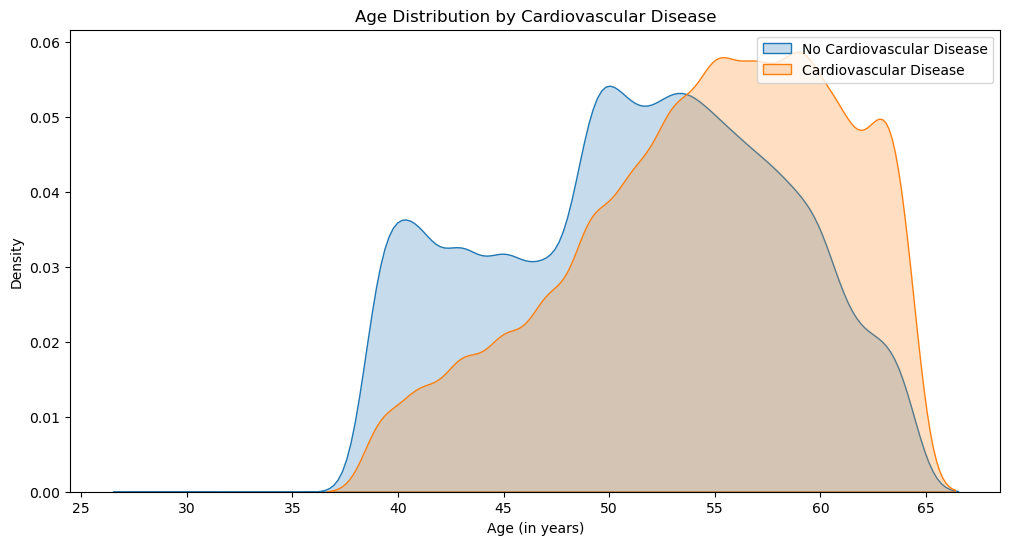

In [11]:
plt.figure(figsize=(12, 6))

# Age Distribution by Cardiovascular Disease
# Peaks in the graph indicate age ranges where cardiovascular disease is more prevalent, helping identify potential risk groups.
sns.kdeplot(df[df['cardio'] == 0]['age_years'], label='No Cardiovascular Disease', shade=True)
sns.kdeplot(df[df['cardio'] == 1]['age_years'], label='Cardiovascular Disease', shade=True)

plt.xlabel('Age (in years)')
plt.ylabel('Density')
plt.title('Age Distribution by Cardiovascular Disease')
plt.legend()
plt.show()

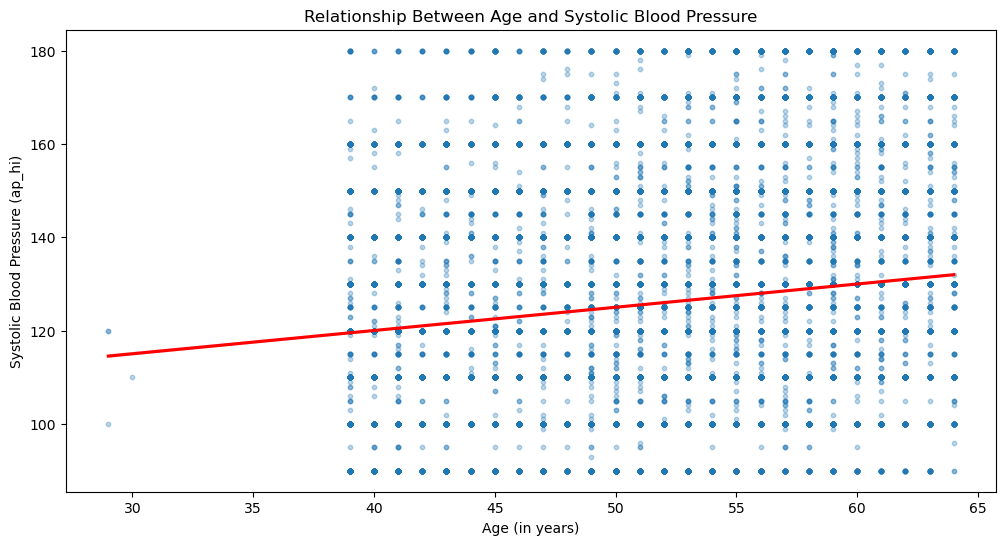

In [12]:
plt.figure(figsize=(12, 6))

# Scatter plot with regression line
# Relationship Between Age and Systolic Blood Pressure
# The red line helps observe how blood pressure tends to change with age, providing insights into age-related blood pressure trends.

sns.regplot(x='age_years', y='ap_hi', data=df, scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'red'})

plt.xlabel('Age (in years)')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.title('Relationship Between Age and Systolic Blood Pressure')
plt.show()

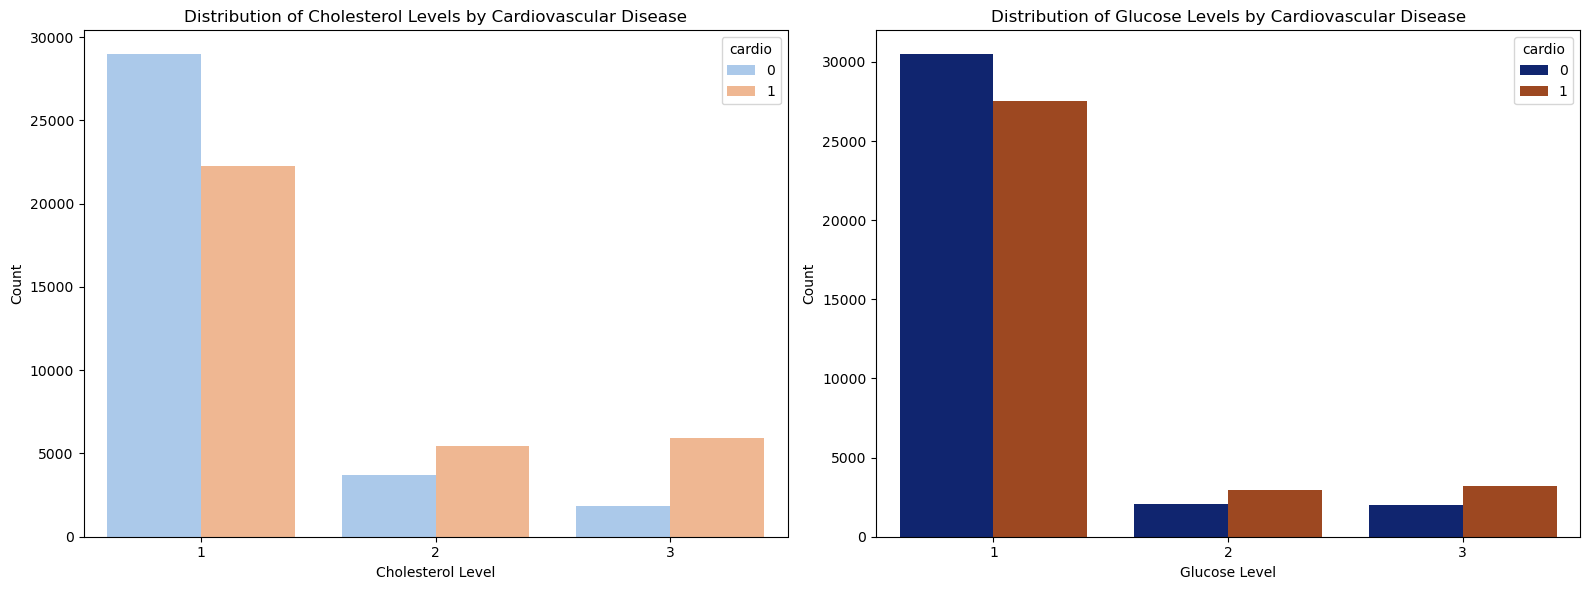

In [13]:
plt.figure(figsize=(16, 6))

# Cholesterol and Glucose Levels by Cardiovascular Disease
plt.subplot(1, 2, 1)
sns.countplot(x='cholesterol', hue='cardio', data=df, palette='pastel')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.title('Distribution of Cholesterol Levels by Cardiovascular Disease')

plt.subplot(1, 2, 2)
sns.countplot(x='gluc', hue='cardio', data=df, palette='dark')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.title('Distribution of Glucose Levels by Cardiovascular Disease')

plt.tight_layout()
plt.show()

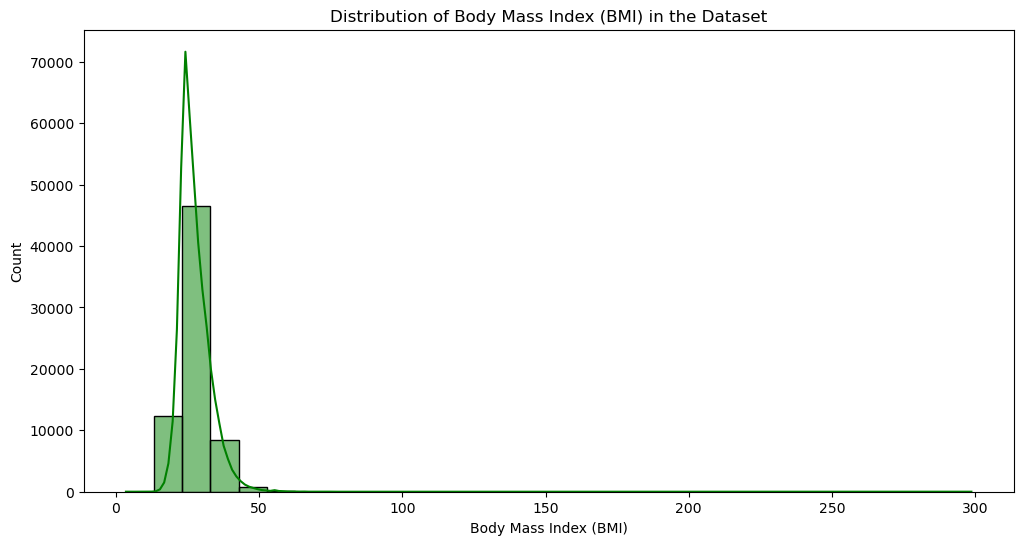

In [14]:
plt.figure(figsize=(12, 6))

# Distribution of Body Mass Index (BMI) in the Dataset
# Peaks or concentrations in the histogram indicate common BMI values, providing an overview of the BMI distribution in the dataset.

sns.histplot(df['bmi'], bins=30, kde=True, color='green')

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Count')
plt.title('Distribution of Body Mass Index (BMI) in the Dataset')
plt.show()

/Users/nisar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


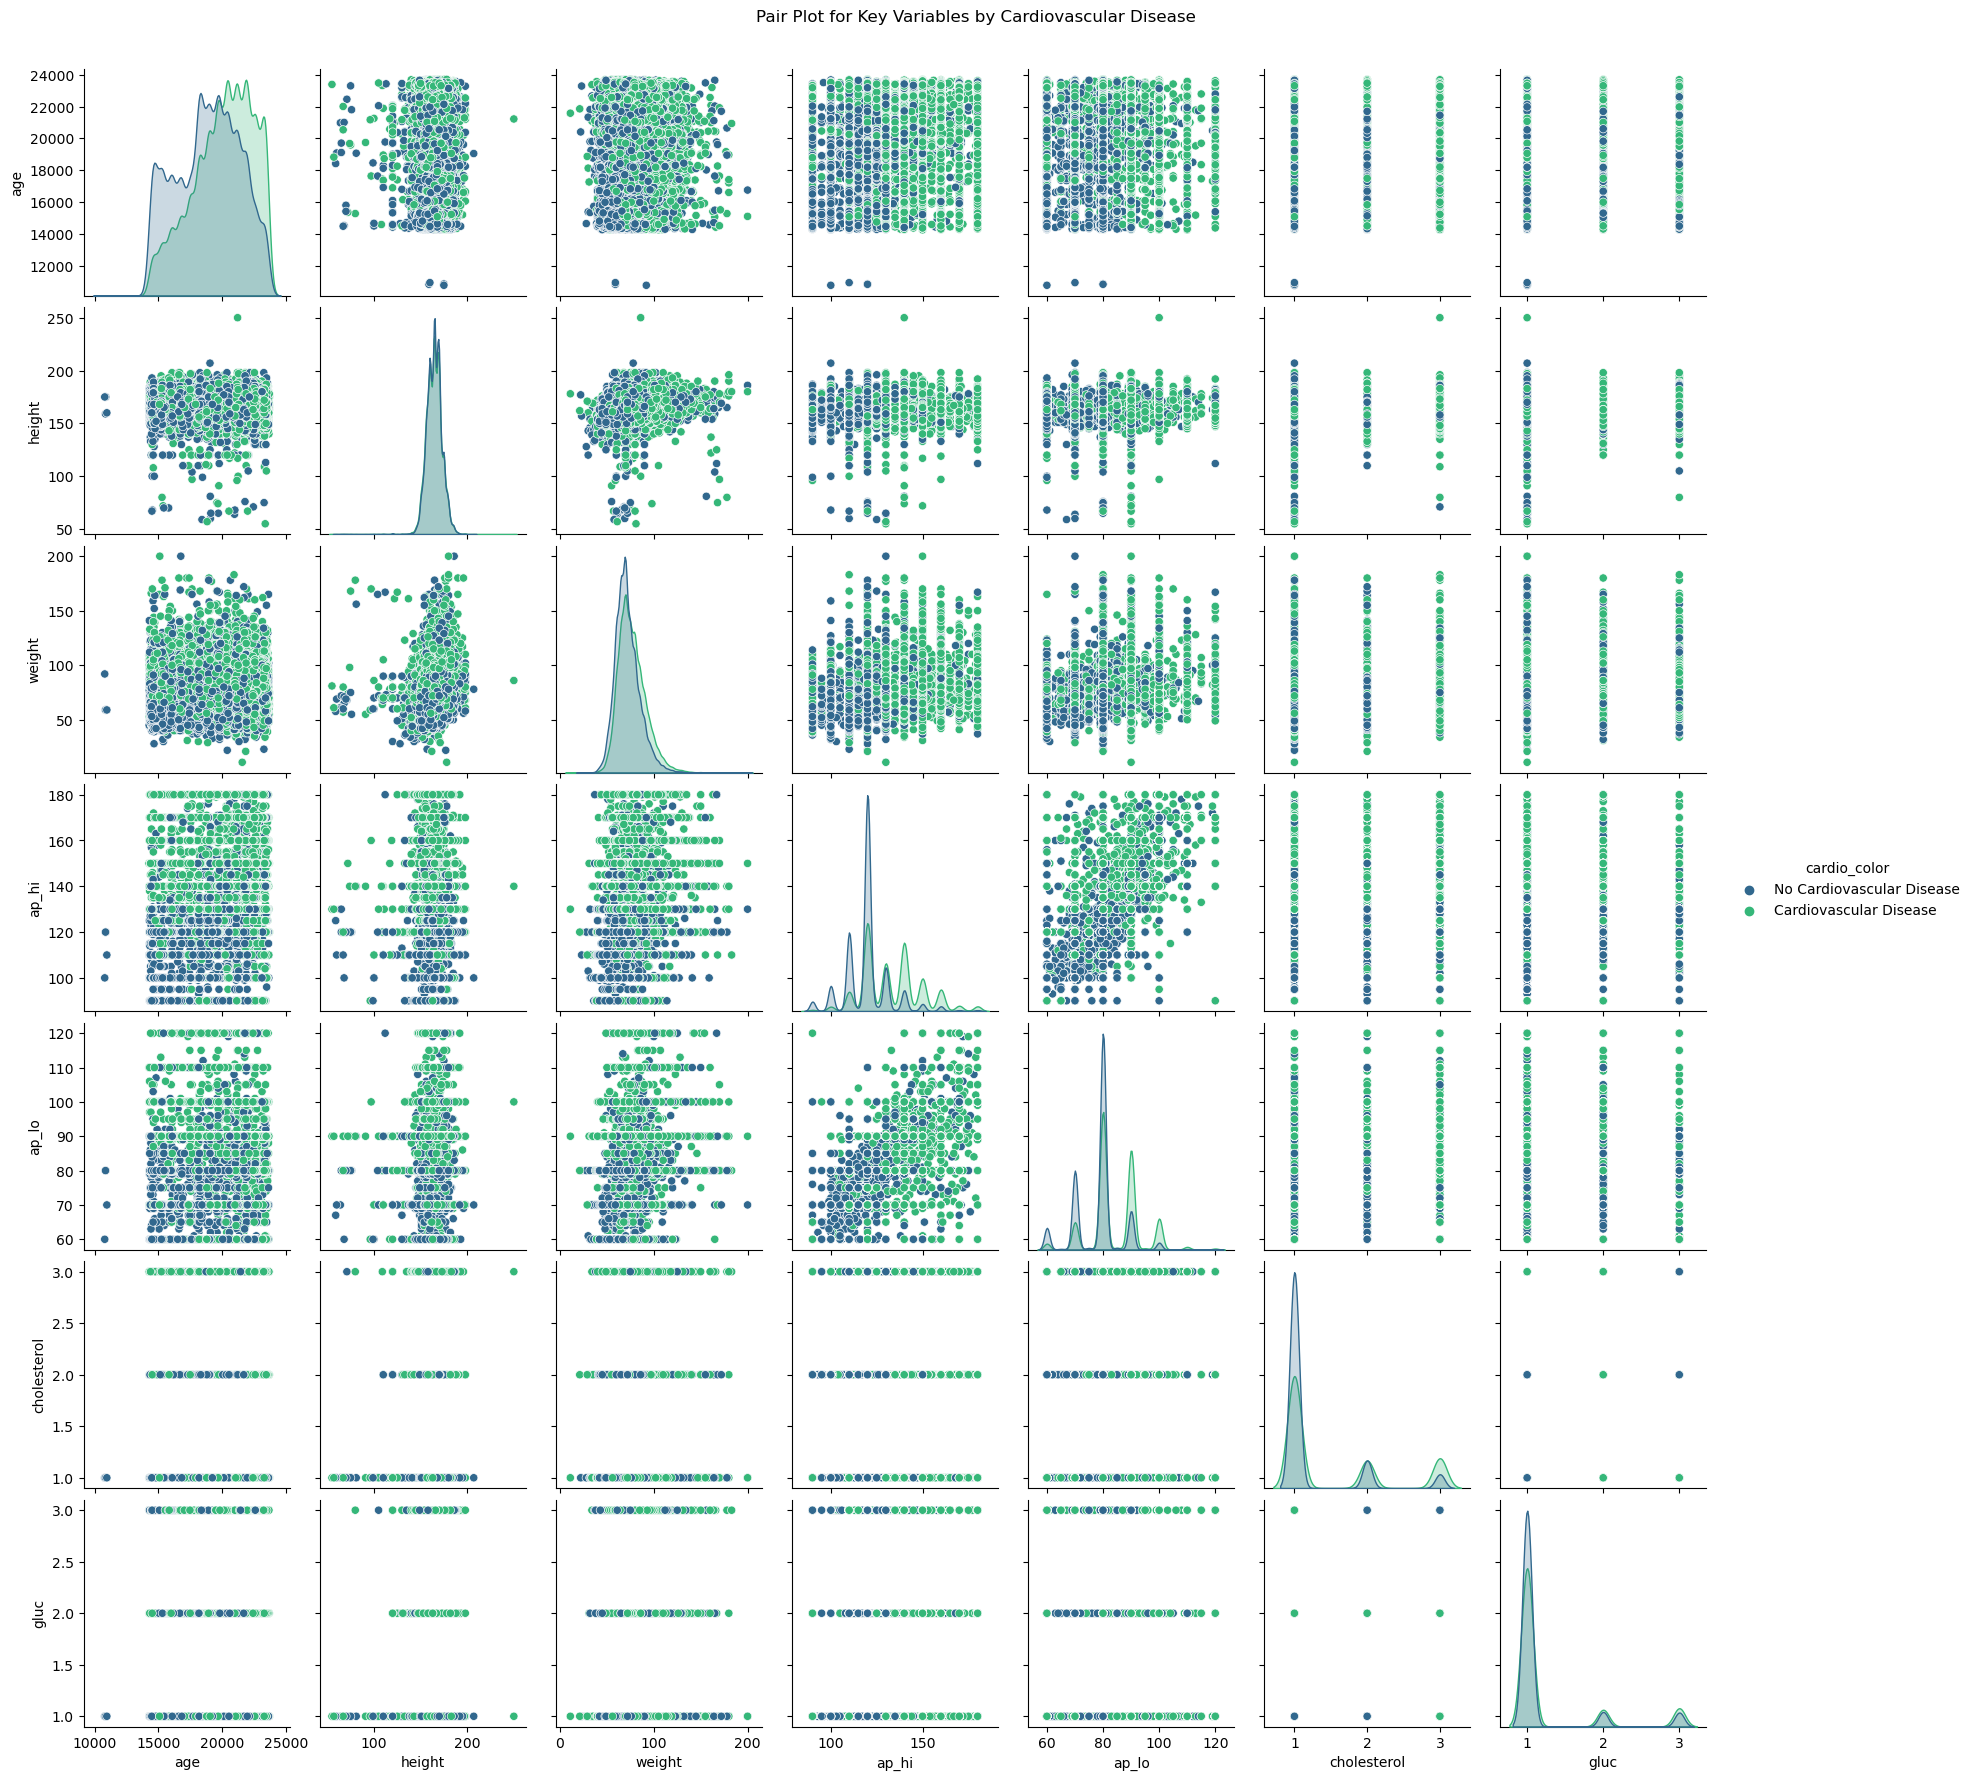

In [15]:
# Pair Plot for Key Variables by Cardiovascular Disease
# The pair plot reveals relationships between age, height, weight, blood pressure, cholesterol, and glucose, with color indicating cardiovascular disease status.
# Selecting key variables for the pair plot
key_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']

# Adding target variable for color differentiation
df['cardio_color'] = df['cardio'].map({0: 'No Cardiovascular Disease', 1: 'Cardiovascular Disease'})

# Create a pair plot
sns.pairplot(df, hue='cardio_color', vars=key_vars, palette='viridis')
plt.suptitle('Pair Plot for Key Variables by Cardiovascular Disease', y=1.02)
plt.show()

In [16]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

ValueError: could not convert string to float: 'Hypertension Stage 1'

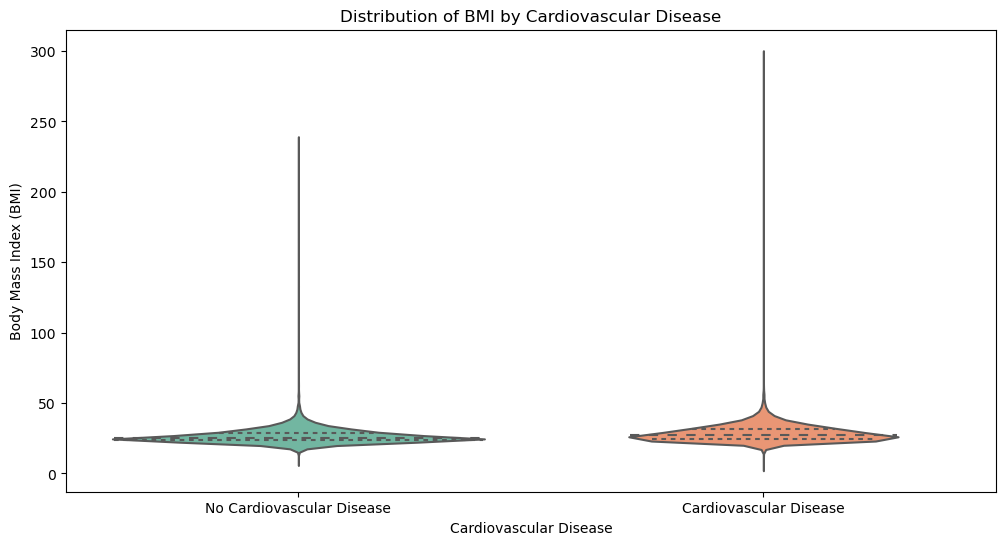

In [17]:
plt.figure(figsize=(12, 6))

# Violin plot for BMI by Cardiovascular Disease
sns.violinplot(x='cardio_color', y='bmi', data=df, palette='Set2', inner='quartile')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Body Mass Index (BMI)')
plt.title('Distribution of BMI by Cardiovascular Disease')
plt.show()

In [18]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Hypertension Stage 1'

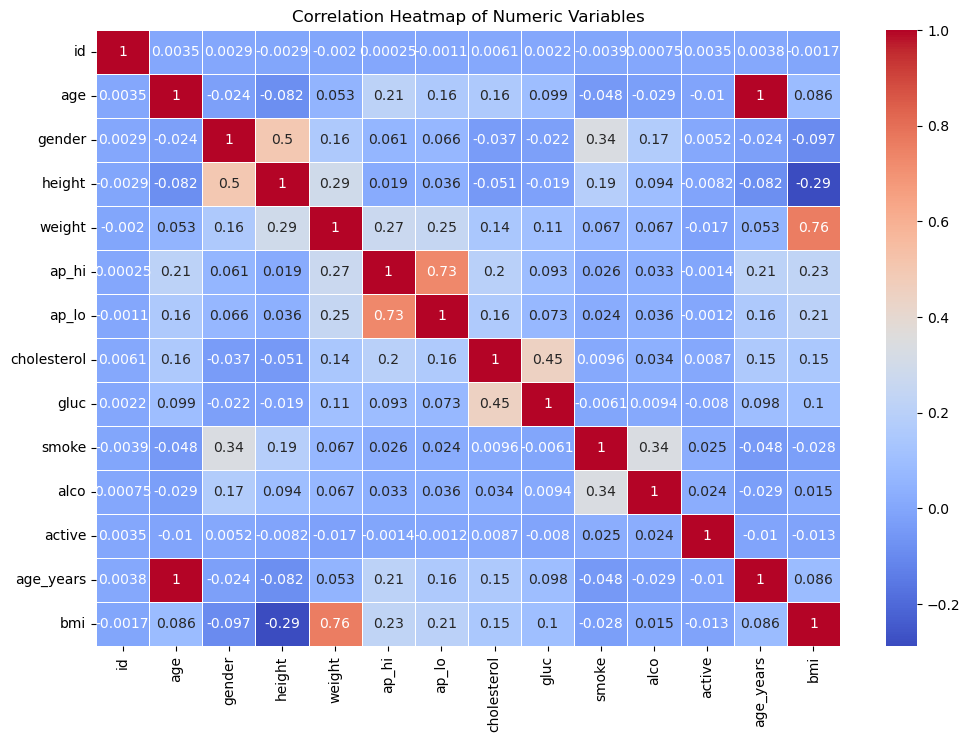

In [19]:
# Selecting only numeric variables for the correlation heatmap
numeric_vars = df.select_dtypes(include=['number']).columns.tolist()

# Remove non-numeric variables and target variable
numeric_vars.remove('cardio')
df_numeric = df[numeric_vars]

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

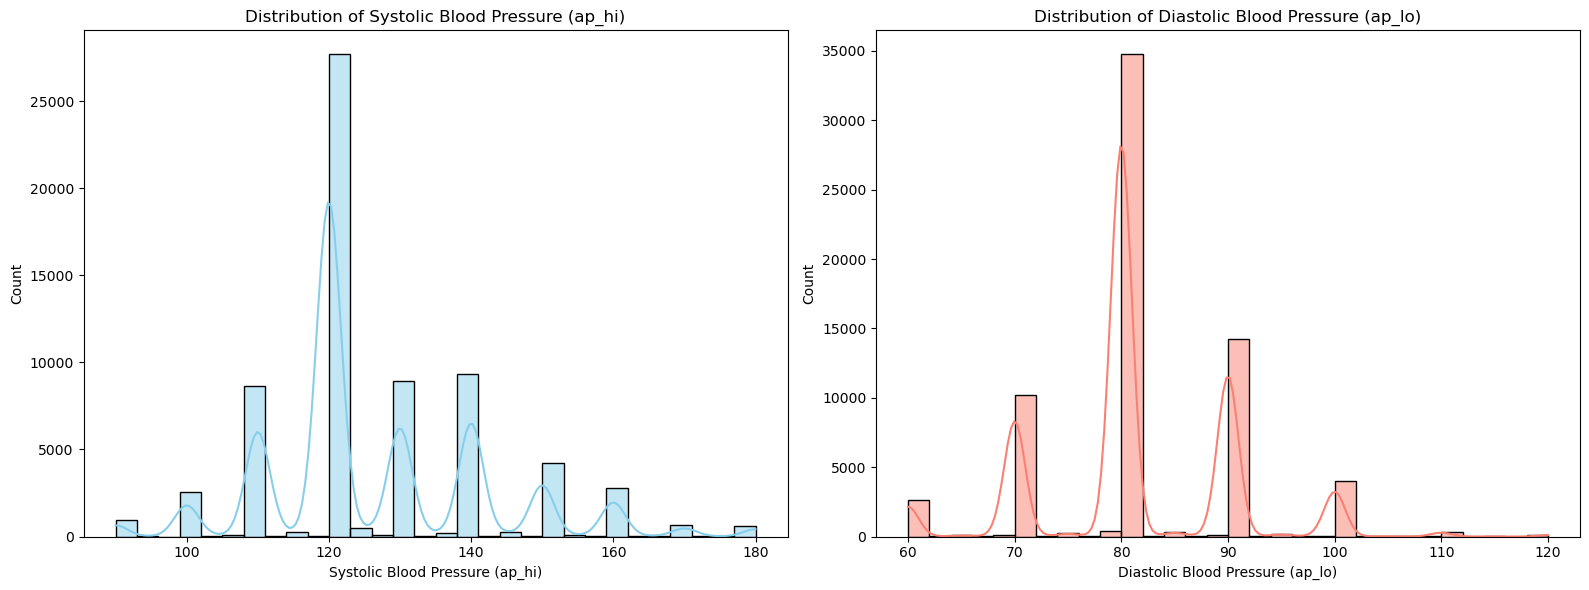

In [20]:
plt.figure(figsize=(16, 6))

# Distribution of Systolic Blood Pressure (ap_hi)
plt.subplot(1, 2, 1)
sns.histplot(df['ap_hi'], bins=30, kde=True, color='skyblue')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Count')
plt.title('Distribution of Systolic Blood Pressure (ap_hi)')

# Distribution of Diastolic Blood Pressure (ap_lo)
plt.subplot(1, 2, 2)
sns.histplot(df['ap_lo'], bins=30, kde=True, color='salmon')
plt.xlabel('Diastolic Blood Pressure (ap_lo)')
plt.ylabel('Count')
plt.title('Distribution of Diastolic Blood Pressure (ap_lo)')

plt.tight_layout()
plt.show()
# These histograms show the distribution of systolic and diastolic blood pressure, providing insights into blood pressure patterns.

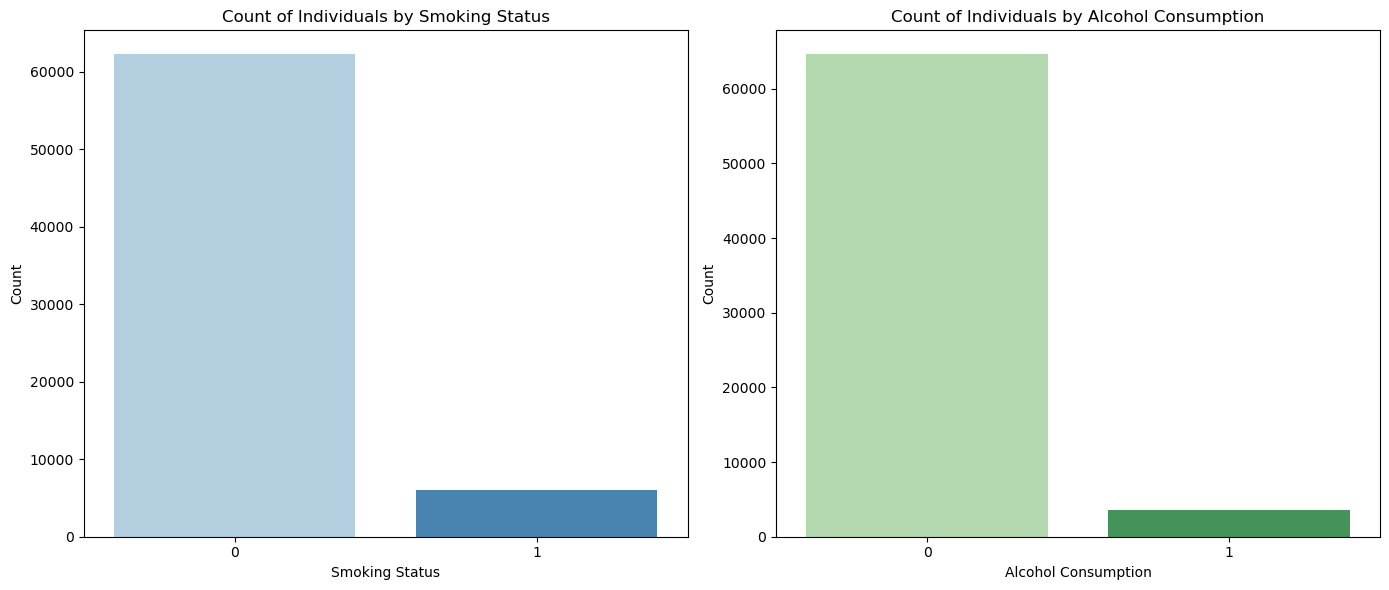

In [21]:
plt.figure(figsize=(14, 6))

# Count Plot for Smoking Status
plt.subplot(1, 2, 1)
sns.countplot(x='smoke', data=df, palette='Blues')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Count of Individuals by Smoking Status')

# Count Plot for Alcohol Consumption
plt.subplot(1, 2, 2)
sns.countplot(x='alco', data=df, palette='Greens')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.title('Count of Individuals by Alcohol Consumption')

plt.tight_layout()
plt.show()
# These count plots display the distribution of individuals based on smoking status and alcohol consumption, providing insights into lifestyle choices.

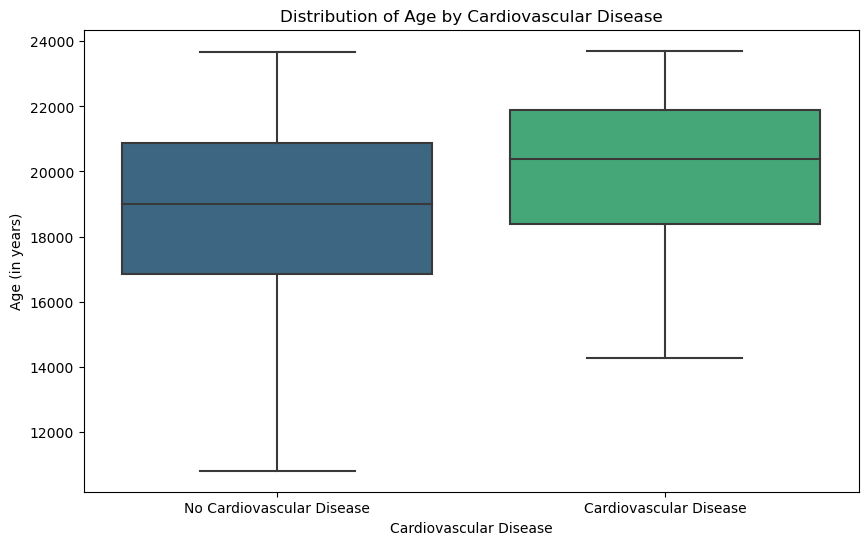

In [22]:
plt.figure(figsize=(10, 6))

# Box Plot for Age by Cardiovascular Disease
sns.boxplot(x='cardio_color', y='age', data=df, palette='viridis')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Age (in years)')
plt.title('Distribution of Age by Cardiovascular Disease')
plt.show()
# This box plot compares the distribution of ages for patients with and without cardiovascular disease, highlighting any differences.

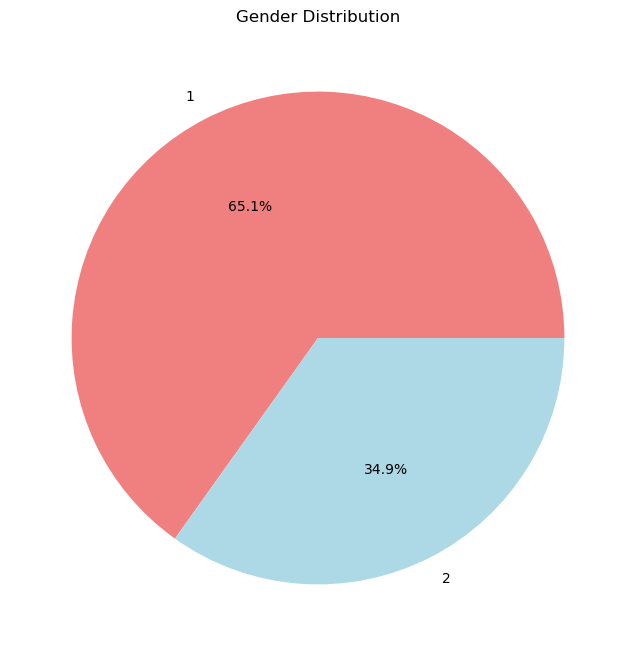

In [23]:
plt.figure(figsize=(8, 8))

# Pie Chart for Gender Distribution
gender_distribution = df['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution')
plt.show()
# This pie chart illustrates the distribution of gender among individuals in the dataset.

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter Plot for Weight vs. Height
sns.scatterplot(x='height', y='weight', data=df, alpha=0.5, color='purple')
plt.xlabel('Height (in cm)')
plt.ylabel('Weight (in kg)')
plt.title('Relationship Between Weight and Height')
plt.show()
# This scatter plot helps observe the relationship between weight and height, providing insights into body composition.

In [ ]:
# Assuming there is a temporal variable 'time' in the dataset
plt.figure(figsize=(12, 6))

# Line Plot for Cardiovascular Disease Trends Over Time
sns.lineplot(x='time', y='cardio', data=df, marker='o', color='darkorange')
plt.xlabel('Time')
plt.ylabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.title('Cardiovascular Disease Trends Over Time')
plt.show()
# This line plot illustrates trends in cardiovascular disease prevalence over time, providing insights into temporal patterns.

In [ ]:
plt.figure(figsize=(10, 8))

# Joint Plot for Age and BMI
sns.jointplot(x='age', y='bmi', data=df, kind='hex', color='darkcyan')
plt.xlabel('Age (in years)')
plt.ylabel('Body Mass Index (BMI)')
plt.title('Bivariate Distribution of Age and BMI')
plt.show()
# This joint plot illustrates the bivariate distribution of age and BMI, highlighting areas with higher density.

In [ ]:
plt.figure(figsize=(10, 10))
theta = df['age'] * (360 / df['age'].max())  # Mapping age to polar coordinates
plt.polar(np.radians(theta), df['cardio'], marker='o', linestyle='None', color='darkorange')
plt.title('Distribution of Cardiovascular Disease by Age (Polar Plot)')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df['age'], df['weight'], df['ap_hi'], c=df['cardio'], cmap='viridis', s=20)
ax.set_xlabel('Age (in years)')
ax.set_ylabel('Weight (in kg)')
ax.set_zlabel('Systolic Blood Pressure')
ax.set_title('3D Scatter Plot for Age, Weight, and Blood Pressure')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='age', y='weight', color='cardio', size='ap_hi', hover_data=['bmi'])
fig.update_layout(title='Interactive Scatter Plot', xaxis_title='Age', yaxis_title='Weight')
fig.show()

In [ ]:
import altair as alt

alt.Chart(df).mark_circle().encode(
    x='age:Q',
    y='ap_hi:Q',
    color='cholesterol:N',
    tooltip=['age', 'ap_hi', 'cholesterol']
).properties(
    title='Declarative Scatter Plot by Cholesterol Levels',
    width=600,
    height=400
).interactive()

In [ ]:
pip install altair

In [ ]:
import altair as alt

alt.Chart(df).mark_circle().encode(
    x='age:Q',
    y='ap_hi:Q',
    color='cholesterol:N',
    tooltip=['age', 'ap_hi', 'cholesterol']
).properties(
    title='Declarative Scatter Plot by Cholesterol Levels',
    width=600,
    height=400
).interactive()

In [ ]:
import altair as alt

# Enable the VegaFusion data transformer
alt.data_transformers.enable("vegafusion")

# Now you can create your Altair chart
alt.Chart(df).mark_circle().encode(
    x='age:Q',
    y='ap_hi:Q',
    color='cholesterol:N',
    tooltip=['age', 'ap_hi', 'cholesterol']
).properties(
    title='Declarative Scatter Plot by Cholesterol Levels',
    width=600,
    height=400
).interactive()